# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 615


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# responses=[]
# city_url = url+ "appid=" + weather_api_key +"&q="+ city
# city_weather = requests.get(city_url)
# weather_json = city_weather.json()

# responses.append(weather_json)
# responses

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url+ "appid=" + weather_api_key +"&q="+ city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp =city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country =city_weather['sys']['country']
        city_date =city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | provideniya
Processing Record 4 of Set 1 | portobelo
Processing Record 5 of Set 1 | kollumerland
City not found. Skipping...
Processing Record 6 of Set 1 | yellowknife
Processing Record 7 of Set 1 | barrow
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | gorontalo
Processing Record 10 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | chokurdakh
Processing Record 13 of Set 1 | khasan
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | puerto ayora
Processing Record 17 of Set 1 | ilulissat
Processing Record 18 of Set 1 | hilo
Processing Record 19 of Set 1 | airai
Processing Record 20 of Set 1 | bodoco
City not found. Skipping...
Processing Record 21 of Set 1

Processing Record 33 of Set 4 | lampa
Processing Record 34 of Set 4 | litoral del san juan
City not found. Skipping...
Processing Record 35 of Set 4 | petropavlovsk-kamchatskiy
Processing Record 36 of Set 4 | tabat
Processing Record 37 of Set 4 | vyartsilya
Processing Record 38 of Set 4 | longyearbyen
Processing Record 39 of Set 4 | okmulgee
Processing Record 40 of Set 4 | kailua
Processing Record 41 of Set 4 | magui
City not found. Skipping...
Processing Record 42 of Set 4 | oyama
Processing Record 43 of Set 4 | longlac
City not found. Skipping...
Processing Record 44 of Set 4 | azimur
City not found. Skipping...
Processing Record 45 of Set 4 | qaanaaq
Processing Record 46 of Set 4 | pisco
Processing Record 47 of Set 4 | touros
Processing Record 48 of Set 4 | los llanos de aridane
Processing Record 49 of Set 4 | launceston
Processing Record 0 of Set 5 | kapuskasing
Processing Record 1 of Set 5 | dudinka
Processing Record 2 of Set 5 | praia
Processing Record 3 of Set 5 | thompson
Proce

Processing Record 23 of Set 8 | sinkat
City not found. Skipping...
Processing Record 24 of Set 8 | narsaq
Processing Record 25 of Set 8 | balimo
City not found. Skipping...
Processing Record 26 of Set 8 | ust-barguzin
Processing Record 27 of Set 8 | den helder
Processing Record 28 of Set 8 | mount isa
Processing Record 29 of Set 8 | dicabisagan
Processing Record 30 of Set 8 | faya
Processing Record 31 of Set 8 | sulangan
Processing Record 32 of Set 8 | biak
Processing Record 33 of Set 8 | mayo
Processing Record 34 of Set 8 | komatsu
Processing Record 35 of Set 8 | port-de-bouc
Processing Record 36 of Set 8 | chuncheng
Processing Record 37 of Set 8 | grindavik
Processing Record 38 of Set 8 | vozuca
Processing Record 39 of Set 8 | key largo
Processing Record 40 of Set 8 | pangody
Processing Record 41 of Set 8 | ribas do rio pardo
Processing Record 42 of Set 8 | totness
Processing Record 43 of Set 8 | kuhdasht
Processing Record 44 of Set 8 | samusu
City not found. Skipping...
Processing R

Processing Record 11 of Set 12 | louisbourg
City not found. Skipping...
Processing Record 12 of Set 12 | grand gaube
Processing Record 13 of Set 12 | estacion coahuila
Processing Record 14 of Set 12 | privokzalnyy
City not found. Skipping...
Processing Record 15 of Set 12 | cabedelo
Processing Record 16 of Set 12 | phan thiet
Processing Record 17 of Set 12 | asyut
Processing Record 18 of Set 12 | sangar
Processing Record 19 of Set 12 | antofagasta
Processing Record 20 of Set 12 | beringovskiy
Processing Record 21 of Set 12 | shemonaikha
Processing Record 22 of Set 12 | warrnambool
Processing Record 23 of Set 12 | zavyalovo
Processing Record 24 of Set 12 | lagoa
Processing Record 25 of Set 12 | namatanai
Processing Record 26 of Set 12 | zyryanka
Processing Record 27 of Set 12 | shimoda
Processing Record 28 of Set 12 | manicore
Processing Record 29 of Set 12 | teahupoo
Processing Record 30 of Set 12 | vieux fort
Processing Record 31 of Set 12 | port pirie
Processing Record 32 of Set 12 |

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          561
Lat           561
Lng           561
Max Temp      561
Humidity      561
Cloudiness    561
Wind Speed    561
Country       561
Date          561
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lompoc,34.6391,-120.4579,290.38,84,100,4.63,US,1679341826
1,jamestown,42.0970,-79.2353,280.66,31,0,7.20,US,1679342057
2,provideniya,64.3833,-173.3000,270.62,95,100,12.70,RU,1679342067
3,portobelo,9.5500,-79.6500,302.65,73,93,5.31,PA,1679342068
4,yellowknife,62.4560,-114.3525,263.46,52,40,3.60,CA,1679341843


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lompoc,34.6391,-120.4579,290.38,84,100,4.63,US,1679341826
1,jamestown,42.0970,-79.2353,280.66,31,0,7.20,US,1679342057
2,provideniya,64.3833,-173.3000,270.62,95,100,12.70,RU,1679342067
3,portobelo,9.5500,-79.6500,302.65,73,93,5.31,PA,1679342068
4,yellowknife,62.4560,-114.3525,263.46,52,40,3.60,CA,1679341843


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

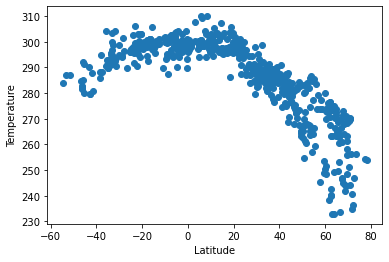

In [18]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']

# Incorporate the other graph properties
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

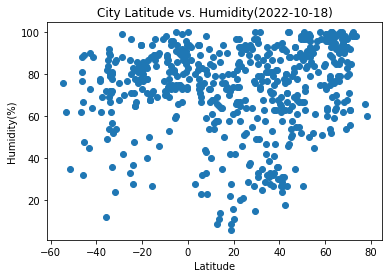

In [22]:
# Build the scatter plots for latitude vs. humidity
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']

# Incorporate the other graph properties
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title("City Latitude vs. Humidity(2022-10-18)")
# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

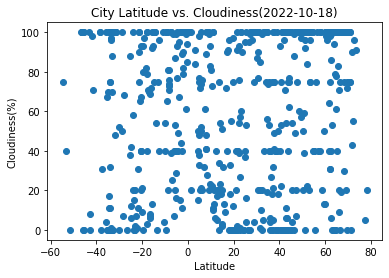

In [24]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']

# Incorporate the other graph properties
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title("City Latitude vs. Cloudiness(2022-10-18)")
# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

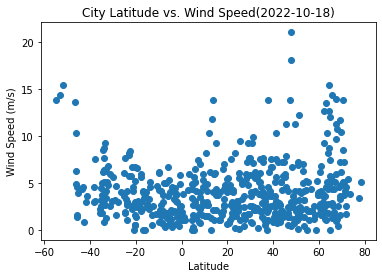

In [26]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']

# Incorporate the other graph properties
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title("City Latitude vs. Wind Speed(2022-10-18)")
# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [75]:
# Define a function to create Linear Regression plots
def linear_regression(x_values,y_values,xlabel,ylabel):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(f"The r-value is: {rvalue**2}")
    print(line_eq)
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(20,15),fontsize=15,color="red")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [76]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[(city_data_df["Lat"]>= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lompoc,34.6391,-120.4579,290.38,84,100,4.63,US,1679341826
1,jamestown,42.0970,-79.2353,280.66,31,0,7.20,US,1679342057
2,provideniya,64.3833,-173.3000,270.62,95,100,12.70,RU,1679342067
3,portobelo,9.5500,-79.6500,302.65,73,93,5.31,PA,1679342068
4,yellowknife,62.4560,-114.3525,263.46,52,40,3.60,CA,1679341843


In [77]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"]< 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
6,port elizabeth,-33.9180,25.5701,293.32,80,0,5.14,ZA,1679342070
8,ushuaia,-54.8000,-68.3000,283.94,76,75,13.89,AR,1679341984
11,rikitea,-23.1203,-134.9692,299.58,78,2,5.77,PF,1679342074
12,punta arenas,-53.1500,-70.9167,287.16,62,40,14.40,CL,1679342076
13,puerto ayora,-0.7393,-90.3518,304.13,86,61,4.92,EC,1679342076


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7661379655423395
y = -0.71x + 309.43


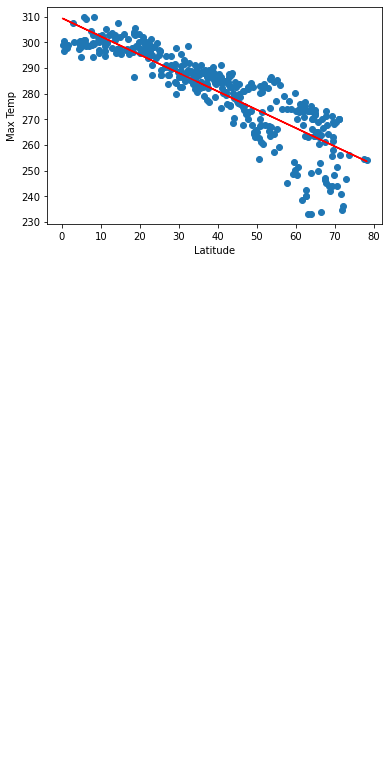

In [78]:
# Linear regression on Northern Hemisphere
linear_regression(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'],'Latitude','Max Temp')

The r-value is: 0.40084677756425235
y = 0.25x + 301.2


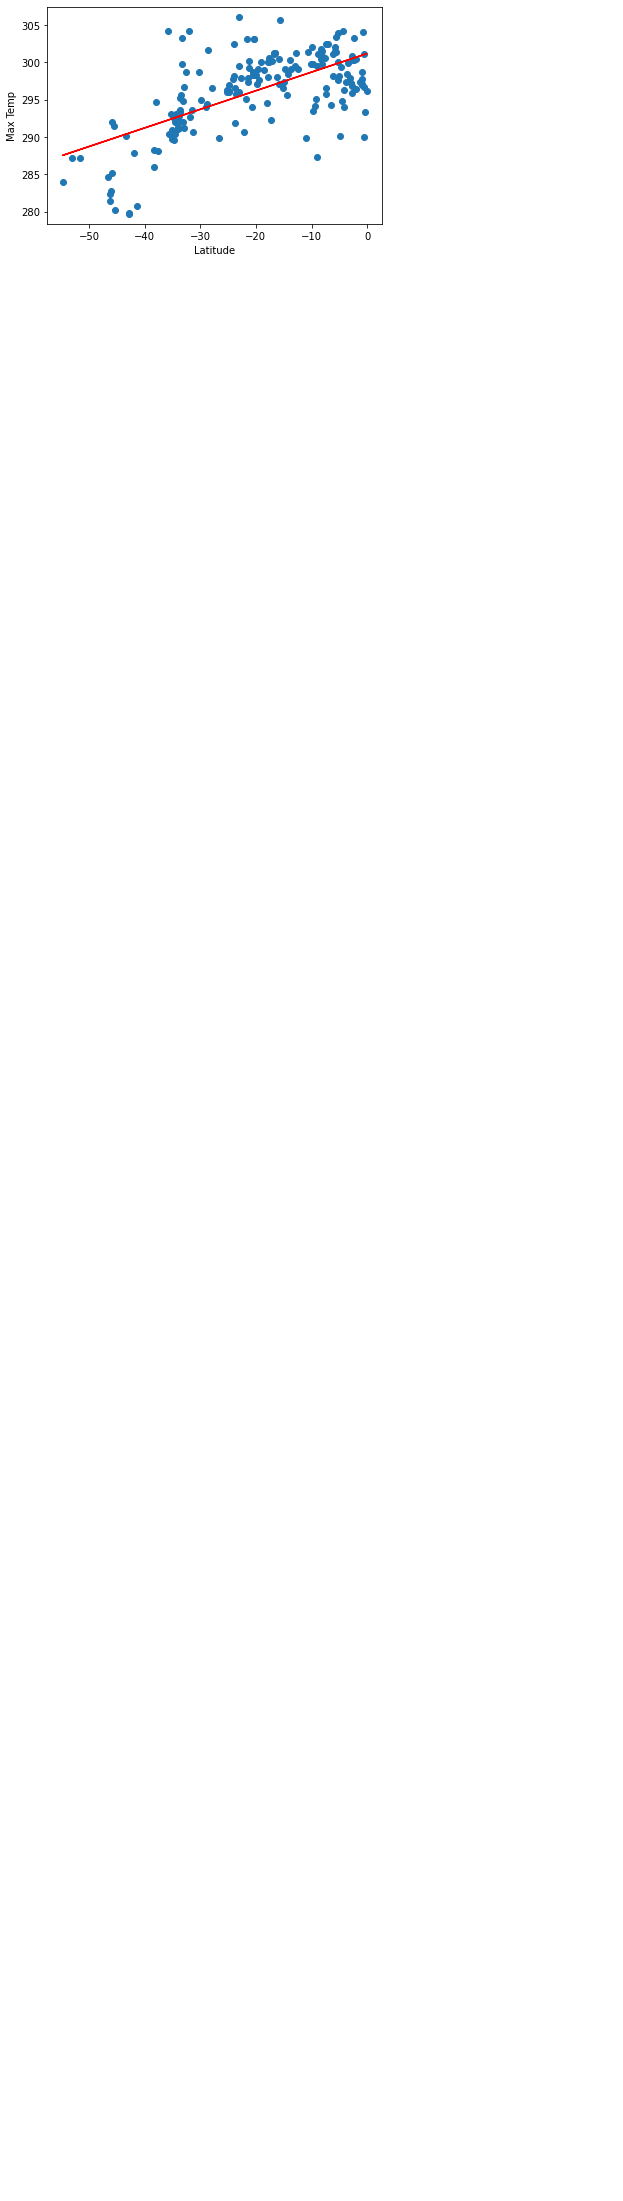

In [79]:
# Linear regression on Southern Hemisphere
linear_regression(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'],'Latitude','Max Temp')

**Discussion about the linear relationship:** For the northern hemisphere, as the latitude increases the maximum temperature is predicted to decrease by -0.71.  For the southen hemisphere, as the latitude increases the maximum temperature is predicted to increase by 0.25

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.08139209892964518
y = 0.32x + 59.31


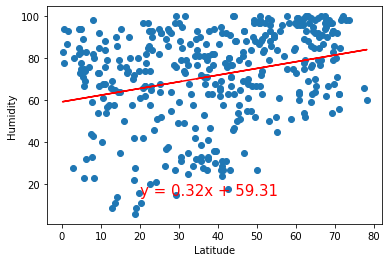

In [80]:
# Northern Hemisphere
linear_regression(northern_hemi_df['Lat'],northern_hemi_df['Humidity'],'Latitude','Humidity')

The r-value is: 0.11546661847399463
y = 0.4x + 83.85


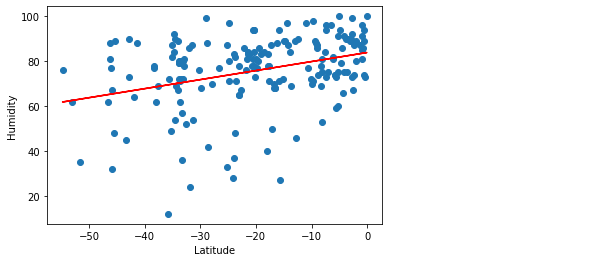

In [81]:
# Southern Hemisphere
linear_regression(southern_hemi_df['Lat'],southern_hemi_df['Humidity'],'Latitude','Humidity')

**Discussion about the linear relationship:** For both the northern hemisphere and the southern hemisphere, as the latitude increases the humidity increases. The northern hemisphere increases by 0.32 for each unit and the southern hemisphere increases by 0.4 for each unit.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.041299409554591174
y = 0.39x + 43.79


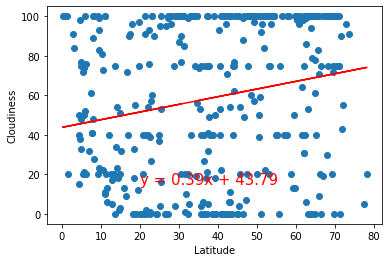

In [82]:
# Northern Hemisphere
linear_regression(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'],'Latitude','Cloudiness')

The r-value is: 0.03312507965743164
y = 0.51x + 68.95


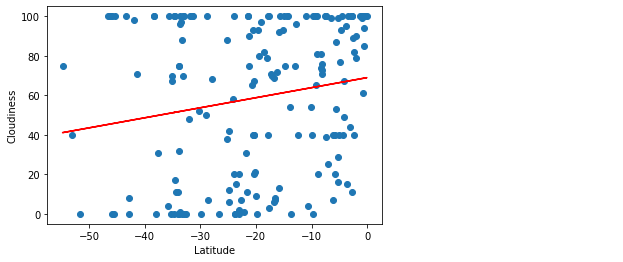

In [83]:
# Southern Hemisphere
linear_regression(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'],'Latitude','Cloudiness')

**Discussion about the linear relationship:** For both the northern hemisphere and the southern hemisphere, as the latitude increases the coudiness increases. The northern hemisphere increases by 0.39 for each unit and the southern hemisphere increases by 0.51 for each unit.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.02588293572706448
y = 0.03x + 3.13


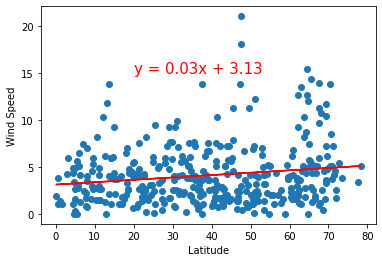

In [84]:
# Northern Hemisphere
linear_regression(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'],'Latitude','Wind Speed')

The r-value is: 0.23071799145377722
y = -0.09x + 1.82


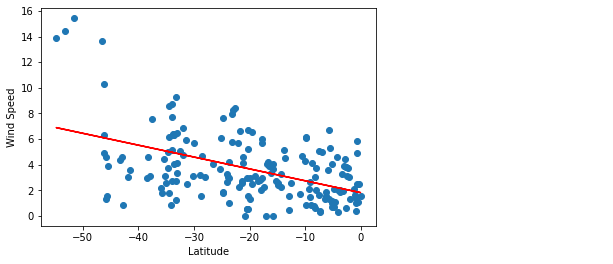

In [85]:
# Southern Hemisphere
linear_regression(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'],'Latitude','Wind Speed')

**Discussion about the linear relationship:** For the northern hemisphere, as the latitude increases the Wind Speed is predicted to increase by 0.03. For the southen hemisphere, as the latitude increases the Wind Speed is predicted to decrease by -0.09.